In [26]:
%matplotlib inline

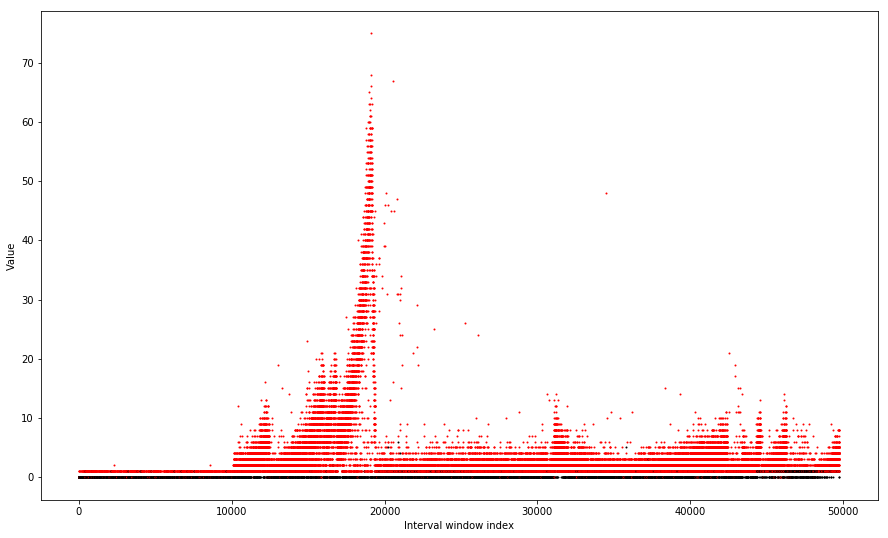

In [28]:
import matplotlib.pyplot as plt
plots = []
with open('minute_aggregated/ddos-0.01s.featureset.csv', 'r+') as f:
    header = f.readline().strip().split(',')
    for i, line in enumerate(f):
        data = line.strip().split(',')
        features = dict(zip(header, data))
        plots.append((i, features['n_icmp'], features['label'] == 'Botnet'))

fig, ax = plt.subplots(figsize=(15, 9))

to_plot = [plots[0]]
x = [plots[0][0]]
y = [plots[0][1]]
i = 0
while i < len(plots):
    while i < len(plots) and plots[i][2] == plots[i-1][2]:
        nx, ny, _ = plots[i]
        x.append(nx)
        y.append(ny)
        i += 1
    ax.scatter(x, y, s=1, color='red' if plots[i-1][2] else 'black')
    if i < len(plots):
        x = [plots[i][0]]
        y = [plots[i][1]]
    i += 1

if len(x) > 0:
    ax.scatter(x, y, s=1, color='black' if not plots[-1][2] else 'red')

plt.ylabel('Value')
plt.xlabel('Interval window index')

plt.show()
